# Introduction to STATA

In this notebook I will be introducing STATA, a statistical software package that is very popular in many social sciences.

## The STATA Interface

When you open stata you will be greeted by the STATA interface:

<img src="img/statainterface2.png" width="800">

There are four separate windows in this interace that we will discuss in turn. We will start in the bottom left, in the **Command Window**. The command window is where you can enter commands into stata. The output of the command will then appear in the aptly named **Results Viewer**.

For example, a basic command in stata is "di" (short for display). This can be used as a calculator or to display text. For example if we write into the command window:

In [1]:
di "Hello World"

Hello World


Then we see "Hello World" displayed in the results window. In general, you should **not** use the command window very often. It is much more efficient to type commands into a "do-file" which is a script that has a list of commands. You can then run the script file in order to execute the list of commands. This will allow you to quickly rerun commands and save you a lot of time retyping commands that were slightly wrong. It also allows others to reproduce your work. You can just send them the do-file!

The remaining two windows on the right are the **Variables Window** and the **Properties Window**. The variables window will display the name of the variables in a dataset along with a short description in Label (not everyone that constructs datasets adds labels to all variables, though it is good practice to do so. Also, in many cases you will be constructing your dataset from other sources and will need to add the labels yourself).

## Workflow 

Before loading the dataset, now is a good time to discuss workflow, which for our purposes will be how to organize your files. In this class, we will have a number of empirical problem sets, and you will save time and frustration simply by setting up your folders in an efficient way.

To understand what I mean about workflow, let's take an example of how my folders were probably organized for my first empirical problem set. 

<img src = "img/baddirectory1.png" width="600">

Ok, so there is a lot to dislike by this trainwreck of a folder. First, there are a number of different data sets, and the difference between them is not at all clear. Imagine taking a break from the problem set and coming back to this folder. You might waste a lot of time trying to figure out what file is useful for what. Is the right dataset data_clean.dta, data_new.dta or data.dta? What is data_alt.dta and temp_data.dta? Also, there are two folders "misc" and "temp" and it is unclear what makes a file or dataset miscellaneous vs. what makes a file or dataset temporary. 

In practie, for a single problem set, you can probably get by with this type of workflow. But as projects get more complicated, bad workflow practices will make your work more and more frustrating. It is better to stay organized (even if it takes a bit longer to set up at times). So we know this is a bad directory, but what does a good directory look like? 

First, lets add more folders that separate files by their function, as follows:

<img src = "img/gooddirectory2.png" width="600">

So now we have four different folders, each with a clear purpose. "code" will house all the code for the problem set. "data" will include all the data for the problem set. "results" will have the results from the problem set, such as tables and figures, along with the write up of the results. "archive" will be our folder where we put old versions of files we don't want to delete. While this gives us a good structure for the problem set, it will also be important to not let these folders get disorganized. Don't have multiple versions of code that are unclear in how they relate. Don't find yourself in a situation in which you don't know what version of the dataset you should be using. 

## Log Files, the Working Directory and Loading Data

All right, we have our folders setup and are ready to analyze some data. For this tutorial we are going to load in a dataset from the Researchers at [Opportunity Insights](https://opportunityinsights.org/). This is a truly impressive dataset that answers a particularly interesting question that would have been very difficult to answer even a few years ago. 

The question is the following: how does the higher education system shape intergenerational income inequality in the United States? While college is often seen as a pathway to higher earnings, if children from higher-income families attend better colleges on average, the college system as a whole may not promote mobility and could even amplify income inequality across generations.

To answer this question, the researchers link students to their parents using federal income tax returns. They then link students to their colleges. This allows them to study whether a college takes in a lot of students from low-income backgrounds and then produces high-income graduates. The datset we will be using has an observation for every college in the U.S., along with different measures of intergenerational mobility for its students.


### Log Files

Log files are records of your session in STATA. Everything you type and every result that comes out of the command window will be record in the log file. This can be helpful for a number of reasons, including keeping track of what you've done, viewing particularly long ouput, as well as sending to collaborators (or attaching as part of your problem set!)

To create a log file type:

In [2]:
log using tutorial_logfile, text replace

(note: file /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code/tutorial_logf
> ile.log not found)
--------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code/tutorial_log
> file.log
  log type:  text
 opened on:  19 Aug 2020, 16:21:57



### The Working Directory

Before we get to analyzing the data, we first need to load it into STATA. This is where we will learn about the working directory. You can check your working directory from within STATA by typing:


In [3]:
pwd

/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code


I can easily change my working directory at any time from within stata. For example, if I want to change the working directory to the results folder instead of the code folder:

In [4]:
cd /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/results

/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/results


I can also change my directory back by using a shortcut:

In [5]:
cd ../code

/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code


The ".." tells the computer to look back one folder (so look back to Jupyter) and then change the directory to "/code". In order to use this method you need to understand where your working directory is. If I tell the computer to change to a directory that doesn't exist I will just get an error.

I have placed a version of the dataset named "mrc_table1-2.dta" in my folder titled "data". Now to load the dataset we can use the ``use`` command:

In [6]:
use /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/data/mrc_table1-2.dta, replace

(Preferred Estimates of Access and Mobility Rates by College)


The ``,replace`` option tells STATA to replace whatever data is currently loaded. If there is no data loaded, then you don't strictly need to put the ``,replace`` option. 

One thing to point out here is that I did not have to actually write out the entire path. I just need to understand where the data is relative to my working directory. Therefore, as better way to load the data would be to type:


In [7]:
use ../data/mrc_table1-2.dta, replace

(Preferred Estimates of Access and Mobility Rates by College)


And again I load the data. 

## Getting Started -- Help files, describing, and summarizing data

Ok, so now we have the data loaded. What next? The first thing to do is to get a sense of what is in the data. A good way to is to use the ``describe`` command

In [8]:
describe 


Contains data from ../data/mrc_table1-2.dta
  obs:         2,202                          Preferred Estimates of Access
                                                and Mobility Rates by College
 vars:            15                          21 Jul 2017 22:57
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
super_opeid     double  %12.0g                Institution OPEID / Cluster ID
                                                when combining multiple OPEIDs
name            str141  %141s                 Name of Institution / Super-OPEID
                                                Cluster
czname          str22   %22s                  Commuting Zone Name
state           str2    %9s                   State of constituent instition
                                      

So the ``describe`` command lists some basic statistics about the datset. This dataset has 2,202 observations (or colleges in this case) and 15 variables. In the first collumn we have the variable name. In the second column we have the storage type. "double" and "float" are both numeric variables while the variables with "str" as the prefix are text variables (generally referred to as string variables in stata). Lastly, we have the variable label which gives us a short description of each variable.

Before getting started, it is (sometimes) helpful to just look at the raw data. We can achieve this with typing ``browse`` into command line. Because I don't want to inundate you with a lot of data. I will just show you a small snapshot of the data: 

In [9]:
%head

,super_opeid,name,czname,state,par_median,k_median,par_q1,par_top1pc,kq5_cond_parq1,ktop1pc_cond_parq1,mr_kq5_pq1,mr_ktop1_pq1,trend_parq1,trend_bottom40,count
1,2665,Vaughn College Of Aeronautics And Technology,New York,NY,30900,53000,.36477882,.0011981524,.44843543,.017666299,.16357975,.0064442917,-.079987764,-.057506107,207.6666666666667
2,7273,CUNY Bernard M. Baruch College,New York,NY,42800,57600,.27632242,.0055920202,.46824235,.025568271,.12938586,.0070650866,-.091865495,-.12297224,1083
3,2688,City College Of New York - CUNY,New York,NY,35500,48500,.32546476,.0023351549,.36021557,.014087214,.11723747,.0045848917,-.0980158,-.13879366,582.3333333333334
4,7022,CUNY Lehman College,New York,NY,32500,40700,.36707491,0,.27882966,.0018963498,.10235137,.00069610245,-.057339657,-.090723462,468.3333333333333
5,1140,"California State University, Los Angeles",Los Angeles,CA,36600,43000,.33116928,.0015598091,.29949805,.00083619979,.09918455,.00027692367,-.13313572,-.14919846,1179.666666666667
6,2693,CUNY John Jay College Of Criminal Justice,New York,NY,41800,45200,.27158952,.00097911153,.35684139,.0030840749,.096914381,.00083760242,-.039944887,-.081856675,1228
7,2165,MCPHS University,Boston,MA,83300,112700,.10234574,.0077554816,.91293561,.094175987,.093435071,.0096385116,-.015396656,-.05452856,173.5
8,2791,Pace University,New York,NY,68600,60700,.15173292,.012134688,.55575591,.027615389,.084326468,.0041901637,-.059509847,-.13538049,1353.333333333333
9,2838,State University Of New York At Stony Brook,New York,NY,73600,60100,.16416624,.0044201165,.51245296,.019444995,.084127478,.0031922117,-.067162491,-.10386624,2070.666666666667
10,2696,New York City College Of Technology Of The Cit...,New York,NY,33500,37000,.35256514,.0010819947,.23638399,.0019894305,.083340757,.00070140383,-.070691638,-.091352046,1488.333333333333


Ok so now we want to dig a bit deeper into some of these variables. Let's look at par_median, which as we know from the ``describe`` command is the median parental income for a given college. Let's compute some simple summary statistics by using the ``summarize`` command:
    

In [10]:
summarize par_median


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  par_median |      2,202    77695.46    28463.28      21200     226700


Ok, so the average median parental income for a college student in this sample is around 78,000 dollars. However, there is considerable spread across colleges. The lowest is 21200 and the highest is 226,700. It seems helpful now to get a better sense of that variation between those minimum and maximum values. Let's see if the ``summarize`` command can help us somehow. Many (most) commands have additional options and it is very easy to look up those options. ``help`` [command name] into the command line:


In [11]:
help summarize


[R] summarize -- Summary statistics
                 (View complete PDF manual entry)


Syntax
------

        summarize [varlist] [if] [in] [weight] [, options]

    options           Description
    --------------------------------------------------------------------------
    Main
      detail          display additional statistics
      meanonly        suppress the display; calculate only the mean;
                        programmer's option
      format          use variable's display format
      separator(#)    draw separator line after every # variables; default is
                        separator(5)
      display_options control spacing, line width, and base and empty cells

    --------------------------------------------------------------------------
    varlist may contain factor variables; see fvvarlist.
    varlist may contain time-series operators; see tsvarlist.
    by, rolling, and statsby are allowed; see prefix.
  
    aweights, fweights, and iweights are allowed. 

There are few very helpful parts of this help file. Firs, we can see the syntax for the command. When we first learn a new command, it is common to get a number of erros. Looking carefully at the syntax is usually a clue about where we are going wrong. For ``summarize`` it expects a list of variables (that is what [varlist] refers to). You can also do conditional ``summarize`` commands (that is the [if] [in] refers to, we will do an example of this below). It appears that there are also options available, that are helpfully listed right below the syntax. If we want more details and examples we can just scroll down (if you are ever confused about what the syntax means exactly, it is often helpful to scroll down to the examples). 

Ok, so for our purposes we wanted to know more about the distribution of median parental income, so let's give ``detail`` a shot. The description of this option said it displayed various percentiles so that sounds like it will be helpful here.

In [12]:
summarize par_median, detail


                   Median parental income
-------------------------------------------------------------
      Percentiles      Smallest
 1%        29300          21200
 5%        37800          23900
10%        45100          25100       Obs               2,202
25%        59100          26400       Sum of Wgt.       2,202

50%        74300                      Mean           77695.46
                        Largest       Std. Dev.      28463.28
75%        91700         208900
90%       110300         218100       Variance       8.10e+08
95%       128200         219600       Skewness       1.222058
99%       176900         226700       Kurtosis       5.948575


So now we have a better sense of the value of different percentiles on the left. At the bottom of the distribution moving from the 1st to the 5th percentile is associated with about an 8,500 dollar increase in income. At the top, going from 95th to 99th is associated with a 48,700 dollar increase in income. 

## Generating New Variables

Now that we have a sense of the data, let's get back to 
the primary question: how do colleges contribute to intergenerational income mobility? In particular, we will be focused on understanding which colleges are particularly effective at promoting intergenerational income mobility. Our preferred measure of mobility (defined as "mobility rate") will be a function of two parameters: 

$$
\begin{equation}
\text{mobility rate} = \text{fraction of students from bottom quintile} \times \text{fraction bottom that reach top quintile}
\end{equation}
$$



This definition comes from the paper this dataset is based on and is not self-contained in this dataset, so do not worry if this definition seemed to come out of nowhere. You would need to have read the paper to have determined this. 

So to explain this a bit further, for each college we need to compute two statistics. First, what fraction of students are low-income (which here we define as having parents below the 20th percentile of the income distribution). Second, what fraction of these low-income students achieve high income (i.e. defined as having income above the 80th percentile of income). In simple terms, a college that promotes integenerational mobility (i.e. has a high mobility rate) will tend to enroll more low-income students and the low-income students they do enroll will tend to have higher incomes.

In this, the variable labels are detailed enough that reading the our describe command we can quickly see that all of these variables are already included in the dataset. "mobility rate" is given by the variable ``mr_kq5_pq1``, "fraction of students from bottom quintile" is given by the variable ``par_q1``, and "fraction bottom that reach top quintile" is given by ``kq5_cond_parq1``.

But imagine we did not have the mobility rate variable in the data, but instead had only ``par_q1`` and ``kq5_cond_parq1``. Using the ``gen`` command we can easily construct the mobility rate variable.


In [13]:
gen mobility_rate = par_q1*kq5_cond_parq1

If we have correctly generated ``mobility_rate`` and correctly interpreted ``mr_kq5_pq1`` then the values of these two variables should be exactly the same. One easy way to check this is to use the ``count`` command. Using this command we can count the number of times that ``mobility_rate`` does not equal ``mr_kq5_pq1``


In [14]:
count if mobility_rate != mr_kq5_pq1

  0


The ``!=`` in the line above stands for "not equal to". As promised, the number of times the two are not equal is 0, meaning the two variables are always the same value. We can also count the number of times they are the same, which will just be the number of observations in the dataset:

In [15]:
count if mobility_rate == mr_kq5_pq1

  2,202


In order to explore the data a bit more we are going to create some new regional variables. We have the variable ``state`` in the data. We are going to create a binary variable that is equal to one if the college is in California, and zero otherwise. A binary version, in general, are variables that only take two values (in this case 0 if the college is in California and 1 if the college is in California).

In [16]:
gen CA = (state=="CA")

A useful way to describe binary (or categorical) variables is to use the ``tab`` command, which counts the number of observations in each cell defined by the binary variable. For example:

In [17]:
tab CA


         CA |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,034       92.37       92.37
          1 |        168        7.63      100.00
------------+-----------------------------------
      Total |      2,202      100.00


So 168 of the colleges in the dataset are in California. Let's create another binary variable that is equal to one if the parental median income is greater than average parental median income across all colleges, which if you recall from ``summarize`` command was equal to 77,695.46. 

In [18]:
gen high_parent_income = (par_median>77695.46)

So now we have two binary variables. One that indicates high_parent_income and one that indicates whether the college is in CA. We can also use tabulate with both binary variables. In this case, the command will count the number of observations defined by the two binary variables, as we see below:

In [19]:
tab CA high_parent_income


           |  high_parent_income
        CA |         0          1 |     Total
-----------+----------------------+----------
         0 |     1,138        896 |     2,034 
         1 |        88         80 |       168 
-----------+----------------------+----------
     Total |     1,226        976 |     2,202 


So how do we interpret this table? The cell in the upper right-hand cornered, defined by (0,0), reports the number of colleges in the sample that have ``CA==0`` and ``high_parent_income==0``. So in total there are 1,138 colleges that are not in California, where the median parental income is below the nationwide average. The cell in the upper right-hand corner counts the number of colleges in the sample that have ``CA==0`` and ``high_parent_income==1``. So for colleges not in California, 896 have a median parental income above the nationwide average. So for non-CA colleges about 44 percent have median parental income above the national average.

The cell in the bottome left-hand corner, defined by (1,0), reports the number of colleges in the sample that have ``CA==1`` and ``high_parent_income==0``. So in total there are 88 colleges that are in California, where the median parental income is below the nationwide average. The cell in the bottom right-hand corner counts the number of colleges in the sample that have ``CA==1`` and ``high_parent_income==1``. So for colleges in California, 80 colleges have a median parental income above the nationwide average. So for CA colleges about 48 percent have median parental income above the national average.

Now let's get back to looking at mobility rates, and see how those vary across CA vs. other states. We can do this using a conditional ``summarize`` command. 


In [20]:
sum mobility_rate par_q1 kq5_cond_parq1 if CA==1
sum mobility_rate par_q1 kq5_cond_parq1 if CA==0



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
mobility_r~e |        168    .0275095    .0154819          0   .0991846
      par_q1 |        168    .1443805    .0889914   .0321324   .4606968
kq5_cond_p~1 |        168    .2481358    .1638556          0   .8497473


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
mobility_r~e |      2,034     .017511    .0126387          0   .1635797
      par_q1 |      2,034    .1234973    .0880145   .0111896   .6097748
kq5_cond_p~1 |      2,034    .1917753    .1360376          0   .9192932


So overall, the mobility rate is higher CA than it is for the rest of the country (0.027 vs 0.017). Recalling from our definition of mobility, we can also see that this is due to two factors. First, CA colleges tend to enroll more students from low-income backgrounds (the percent from low-income backgrounds in CA is 14.4 percent vs. 12.3 percent in other states). Additionally, the students from low-income backgrounds tend to earn more. 24.8 percent of the low-income students in CA go on to earn above the 80th percentile of income while 19.2 percent of low-income students from other states go on to earn above the 80th percentile of income. We can drill down even further and look at the data for UCSD alone.

In [21]:
sum mr_kq5_pq1 par_q1 kq5_cond_parq1 if name == "University Of California, San Diego"


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  mr_kq5_pq1 |          1    .0483275           .   .0483275   .0483275
      par_q1 |          1    .0877724           .   .0877724   .0877724
kq5_cond_p~1 |          1    .5506001           .   .5506001   .5506001


So for UCSD, about 9 percent of students come from parents in the bottom 20th percentile of the income distribution, which was lower than the average for all of CA. However, of those 9 percent, 55 percent become high-earners. Therefore, overall, UCSD looks to have a high mobility rate compared to other schools in the nation, as well as other states in CA.

## Graphing in Stata

In this class we are going to put a lot of emphasis on data visualization. It is important to clearly convey the information from the data. Luckily, stata has excellent graphics packages that will help us here. To understand the capabilities, let's look at the help file:







In [22]:
help graph


[G-2] graph -- The graph command
               (View complete PDF manual entry)


Syntax
------

        graph ...

    The commands that draw graphs are

        Command                 Description
        ----------------------------------------------------------------------
        graph twoway            scatterplots, line plots, etc.
        graph matrix            scatterplot matrices
        graph bar               bar charts
        graph dot               dot charts
        graph box               box-and-whisker plots
        graph pie               pie charts
        other                   more commands to draw statistical graphs
        ----------------------------------------------------------------------

    The commands that save a previously drawn graph, redisplay previously
    saved graphs, and combine graphs are

        Command                 Description
        ----------------------------------------------------------------------
        graph save           

The graph command encompasses a large number of commands. For our purposes, we will generally be using ``graph twoway`` which includes a large number of different plot types. Going back to our main example, we think it would be interesting to understand how much variability there is in mobility rates across colleges. We've already looked at CA vs other states, as well as UCSD in particular, but we would like to get a sense of all the data. 

Recalling from class, one way to approximate the distribution of a numerical variable is to construct a histogram. This entails cutting up our numerical variable (mobility rates in this case) into a number of different bins, and then counting the fraction of observations that fall within each bin. Let's try it out

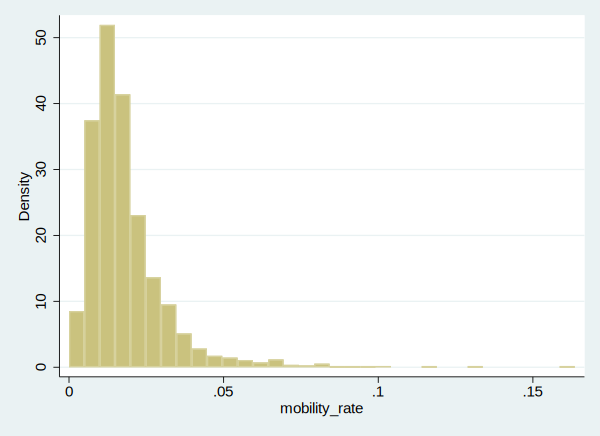

In [23]:
graph twoway histogram mobility_rate

Ok, so interestingly mobility seems to have a "long right tail". While most mobility rates cluster in the 0.02-0.04 range, we have some colleges that have extremely high mobility rates, with some observations above 0.15. There are a number of different modifications we can now make as we seek to understand the variation in mobility rates across college.

First, stata has used a rule-of-thumb to construct these bins. Maybe we want to specify ourselves how large these bins are and see how the picture changes. If we type ``help histogram`` we could see all the different options we have here. One is ``width()`` which allows us to specify the width of each bin. 

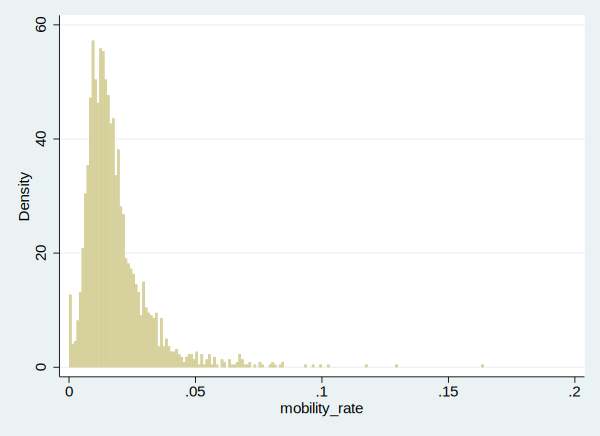

In [24]:
graph twoway histogram mobility_rate, width(0.001)

In this graph I specified a shorter bin width than the rule-of-thumb. There is no right bin width in practice, it really depends on what you want the reader to take away from the picture. 

Next, because we are from UCSD, let's add UCSD to the graph to see how we compare against the entire distribution. If you recall, UCSD's mobility rate was equal to 0.0483275.

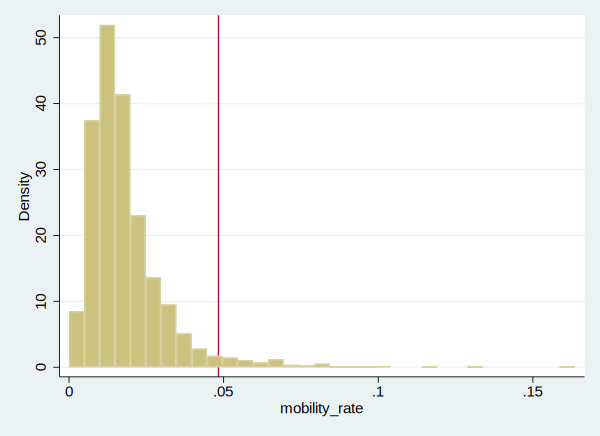

In [25]:
graph twoway histogram mobility_rate, xline(0.0483275)

So we can now see that UCSD has quite a high mobility rate. There is a lot we can do to still improve this graph. Let's (1) add a descriptive title (2) add so labels and (3) make the graph more aesthetically pleasing. 

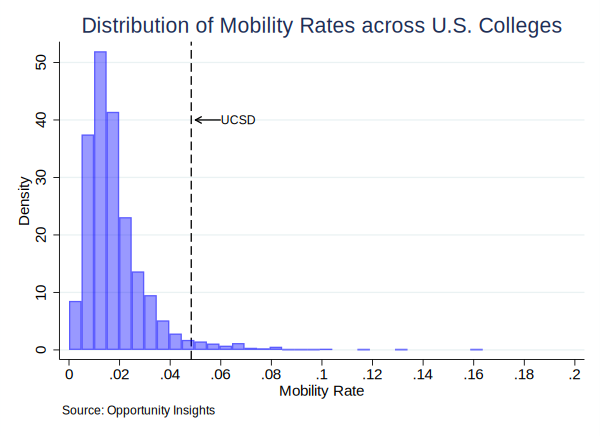

In [26]:
graph twoway histogram mr_kq5_pq1, color(blue%40) ///
    || pcarrowi 40 0.06 40 0.05, lc(black) mcolor(black) ///
    text(40 0.06 "UCSD"  , place(e) size(small) color(black) ) /// 
    xline(0.0483275, lc(black) lp(dash)) ///
    xlabel(0(0.02)0.2) ///
    title("Distribution of Mobility Rates across U.S. Colleges") ///
    xtitle("Mobility Rate") ///
    ytitle("Density") ///
    note("Source: Opportunity Insights") ///
    legend(off) ///
    graphregion(color(white) fcolor(white)) 



Ok so that was a lot of changes. Let's go through it one at a time.
<ul>
<li>Line 1: "color(blue%40)" changed the color of the histogram. The "%40" will make the bars translucent. This isn't really so helpful here, but occasionally you will see pictures with two overlaid histograms. It is easier to see both if you make them translucent.

<li>Line 2: This adds an arrow to the graph that starts at (y1,x1) = (40, 0.06) and ends at the point (y2,x2) = (40, 0.05). The options "lc(black)" make the line part of the arrow black and the option "mcolor(black)" makes the head of the arrow black.

<li>Line 3: This adds the text "UCSD" to the point in the graph (y,x) = (40, 0.06). the option "place(e)" adjusts the location of the text just east of (40,0.06). The "size(small)" option changes the font to a smaller smize, and lastly "color(black)" makes the text of the word black.

<li>Line 4: This defines how the x-axis will appear. "0(0.02).02" tells STATA to make the x-axis go from 0 to 0.2 in increments of 0.02.

<li>Line 5: This gives the graph a descriptive title.

<li>Line 6 & 7: Titles the x and y-axis.

<li>Line 8: Adds a footnote to the graph.

<li>Line 9: Turns the legend off. Sometimes you will want a legend. For example, if there are multiple line plots or multiple histograms, you should give a clear label to each. In this case there is only a single histogram and I've already labelled it in the title.

<li>Line 10: This changes the background of the plot so that it is white instead of the light blue.
<ul>
